> **Note:**  
> This notebook was created using datasets provided by the TripleTen platform.  
> The data files are not included in this repository.  
> All outputs and visualizations have been preserved for review purposes.


# Instacart Customer Order Analysis

**Objective:**  
Analyze customer order patterns and product reordering behavior using Instacart's open dataset to generate business insights.

**Skills used:**  
Data cleaning · Exploratory Data Analysis (EDA) · Data visualization · Pandas · Matplotlib

**Data sources:**  
Instacart’s 2017 Kaggle competition dataset, including orders, products, aisles, and department files.


In this project, data on Instacart orders is cleaned. It is used to describe their customers' shopping habits. 

## Step 1 : Load and Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load orders data
try:
    orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
    print("instacart_orders.csv loaded successfully.")
    display(orders.info())
    display(orders.head())
except FileNotFoundError:
    print("instacart_orders.csv not found. This notebook was developed on the TripleTen platform and requires that dataset.")

instacart_orders.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
# Load products data
try:
    products = pd.read_csv('/datasets/products.csv', sep=';')
    print("products.csv loaded successfully.")
    display(products.info())
    display(products.head())
except FileNotFoundError:
    print("products.csv not found. This notebook was developed on the TripleTen platform and requires that dataset.")

products.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
# Load aisles data
try:
    aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
    print("aisles.csv loaded successfully.")
    display(aisles.info())
    display(aisles.head())
except FileNotFoundError:
    print("aisles.csv not found. This notebook was developed on the TripleTen platform and requires that dataset.")

aisles.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
# Load departments data
try:
    departments = pd.read_csv('/datasets/departments.csv', sep=';')
    print("departments.csv loaded successfully.")
    display(departments.info())
    display(departments.head())
except FileNotFoundError:
    print("departments.csv not found. This notebook was developed on the TripleTen platform and requires that dataset.")

departments.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# Load order_products data
try:
    order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
    print("order_products.csv loaded successfully.")
    display(order_products.info())
    display(order_products.head())
except FileNotFoundError:
    print("order_products.csv not found. This notebook was developed on the TripleTen platform and requires that dataset.")

order_products.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Data from 5 data frames relate to Instacart's catalog and customer orders. 

## Find and remove duplicate values (and describe why you make your choices)

## Step 2 : Handle Duplicates and Missing Values

### `orders` data frame

In [7]:
# Check for duplicated orders
duplicate_orders = orders.duplicated()
("Duplicate orders:", duplicate_orders.sum())

('Duplicate orders:', 15)

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_orders_at_2_am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
(wednesday_orders_at_2_am)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
orders_cleaned = orders.drop_duplicates()
print("Removed", len(orders) - len(orders_cleaned), "duplicates")


Removed 15 duplicates


In [10]:
# Double check for duplicate rows
duplicate_orders = orders_cleaned.duplicated()
print("Duplicate orders:", duplicate_orders.sum())

Duplicate orders: 0


In [11]:
# Double check for duplicate order IDs only
duplicate_order_ids = orders_cleaned["order_id"].duplicated().sum()
print("Duplicate order IDs:", duplicate_order_ids)

Duplicate order IDs: 0


### `products` data frame

In [12]:
# Check for fully duplicate rows
products_duplicated = products.duplicated()
(products_duplicated.sum())

0

In [13]:
# Check for just duplicate product IDs
duplicate_ids = products['product_id'].duplicated().sum()
print("Duplicate product IDs:", duplicate_ids)

Duplicate product IDs: 0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
duplicate_names = products['product_name'].duplicated().sum()
print("Duplicate product names:", duplicate_names)

Duplicate product names: 1257


In [15]:
# Check for duplicate product names that aren't missing
duplicate_names = products['product_name'].duplicated() 
not_missing = ~products['product_name'].isna()  
duplicates_not_missing = products['product_name'][duplicate_names & not_missing]
print(duplicates_not_missing)


Series([], Name: product_name, dtype: object)


### `departments` data frame

In [16]:
department_id_dups = departments['department_id'].duplicated().sum()
print("The number of duplicated department ids is:", department_id_dups)

The number of duplicated department ids is: 0


In [17]:
department_dups = departments['department'].duplicated().sum()
print("The number of duplicated departments is:", department_dups)

The number of duplicated departments is: 0


### `aisles` data frame

In [18]:
aisle_id_dups = aisles['aisle_id'].duplicated().sum()
print("The number of duplicated aisle ids is:", aisle_id_dups)

The number of duplicated aisle ids is: 0


In [19]:
aisle_dups = aisles['aisle'].duplicated().sum()
print("The number of duplicated aisles is:", aisle_dups)

The number of duplicated aisles is: 0


### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
fully_duplicated_rows = order_products[order_products.duplicated(keep=False)]
print(fully_duplicated_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [21]:
# Double check for any other tricky duplicates
tricky_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]
# Display tricky duplicates
print("tricky duplicate entries:", tricky_duplicates)


tricky duplicate entries: Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Find and remove missing values


### `products` data frame

In [22]:
# Are all of the missing product names associated with aisle ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 100)])

missing_product_names = products['product_name'].isna()
aisle_100_check = products[missing_product_names]['aisle_id'] == 100
all_missing_associated_with_aisle_100 = aisle_100_check.all()
print("Are all missing product names associated with aisle ID 100?", all_missing_associated_with_aisle_100)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Are all missing product names associated with aisle ID 100? True


In [23]:
# Are all of the missing product names associated with department ID 21?
print(products[(products['product_name'].isna()) & (products['department_id'] != 21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [24]:
# What is this ailse and department?
# Assuming aisle_id = 100 and department_id = 21 correspond to the missing ones
missing_aisle_id = 100
missing_department_id = 21
# Look up the aisle and department names for the missing IDs
missing_aisle_name = aisles.loc[aisles['aisle_id'] == missing_aisle_id, 'aisle'].values[0]
missing_department_name = departments.loc[departments['department_id'] == missing_department_id, 'department'].values[0]
# Output the result
print(f"The aisle associated with ID 100 is: {missing_aisle_name}")
print(f"The department associated with ID 21 is: {missing_department_name}")


The aisle associated with ID 100 is: missing
The department associated with ID 21 is: missing


In [25]:
# Fill missing product names with 'Unknown'

# Replace NaN values in 'product_name' with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
# Verify that there are no more missing values in 'product_name'
print(products.isnull().sum())  

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


### `orders` data frame

In [26]:
# Are there any missing values where it's not a customer's first order?
not_first_orders = orders[(orders['days_since_prior_order'].isna()) &
                             (orders['order_number'] != 1)]
print("Missing 'days_since_prior_order' when it's not a customer's first order:")
print(not_first_orders)

Missing 'days_since_prior_order' when it's not a customer's first order:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `order_products` data frame

In [27]:
# What are the min and max values in this column?
# Find the minimum value for 'add_to_cart_order'
min_value = order_products['add_to_cart_order'].min()
# Find the maximum value for 'add_to_cart_order'
max_value = order_products['add_to_cart_order'].max()
# Display the results
(f"The minimum value in the 'add_to_cart_order' column is: {min_value}")
(f"The maximum value in the 'add_to_cart_order' column is: {max_value}")


"The maximum value in the 'add_to_cart_order' column is: 64.0"

In [28]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Filter for rows with a missing 'add_to_cart_order' value
orders_with_missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]
# Get unique order IDs for these orders
missing_cart_order_ids = orders_with_missing_cart_order['order_id'].unique()
# The variable 'missing_cart_order_ids' now holds all order IDs with at least one missing 'add_to_cart_order' value

In [29]:
# Do all orders with missing values have more than 64 products?
# Step 1: Identify missing values
missing_add_to_cart = order_products[order_products['add_to_cart_order'].isnull()]
# Step 2: Save unique order IDs with missing 'add_to_cart_order'
missing_order_ids = missing_add_to_cart['order_id'].unique()
# Step 3: Count the number of products in each order
order_product_counts = order_products.groupby('order_id').size()
# Step 4: Filter out the counts where orders have more than 64 products
large_orders_with_missing_values = order_product_counts.loc[missing_order_ids] > 64
# Step 5: Check if all such orders have more than 64 products
all_large_orders = large_orders_with_missing_values.all()
(all_large_orders)

True

In [30]:
# Replace missing values with 999 and convert column to integer type
# Replace NaN values in 'add_to_cart_order' column with 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
# Convert the 'add_to_cart_order' column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore')

# [A] Easy (must complete all to pass)

## Step 3 : Analyze Shopping Habits

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:

# Check unique values in 'order_hour_of_day'
unique_hours = orders['order_hour_of_day'].unique()
print("Unique hours:", sorted(unique_hours))
# Check unique values in 'order_dow'
unique_dow = orders['order_dow'].unique()
print("Unique days of week:", sorted(unique_dow))
# Verify the range for 'order_hour_of_day'
hour_out_of_range = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
if hour_out_of_range.empty:
    print("All 'order_hour_of_day' values are within the range 0-23.")
else:
    print("There are 'order_hour_of_day' values out of the sensible range (0-23).")
# Verify the range for 'order_dow'
dow_out_of_range = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]
if dow_out_of_range.empty:
    print("All 'order_dow' values are within the range 0-6.")
else:
    print("There are 'order_dow' values out of the sensible range (0-6).")

Unique hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Unique days of week: [0, 1, 2, 3, 4, 5, 6]
All 'order_hour_of_day' values are within the range 0-23.
All 'order_dow' values are within the range 0-6.


### [A2] What time of day do people shop for groceries?

0 23


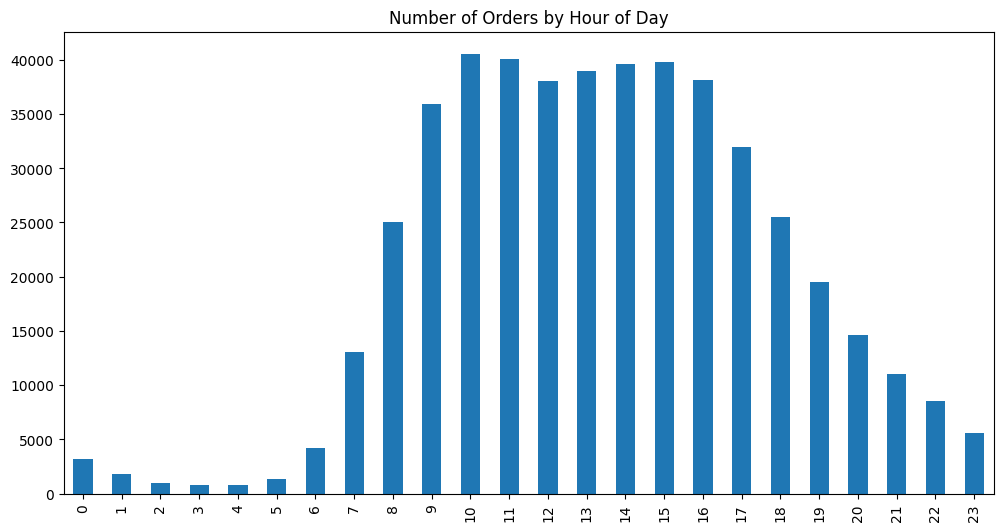

In [32]:

# Verify the hour of day range
print(orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max())
# Count the number of orders for each hour
order_counts_by_hour = orders['order_hour_of_day'].value_counts().sort_index()
# Plot the distribution of orders by hour
order_counts_by_hour.plot(kind='bar', figsize=(12, 6), title='Number of Orders by Hour of Day')
# Show the plot
plt.show()

Most grocery shopping occurs between 9 AM and 5 PM

### [A3] What day of the week do people shop for groceries?

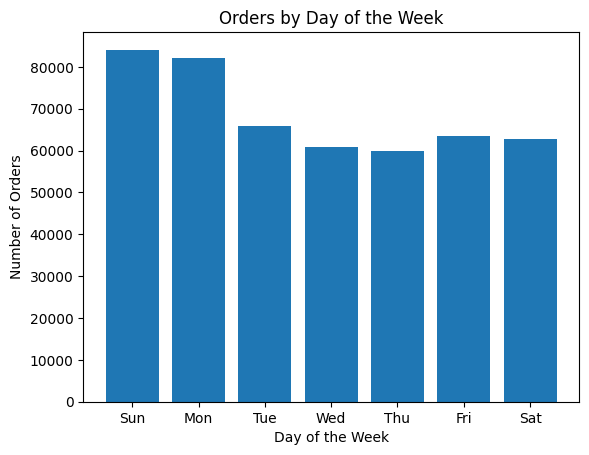

In [33]:
# Assuming 'orders' is your DataFrame and it has a column named 'order_dow' for day of the week.
order_counts = orders['order_dow'].value_counts().sort_index()
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of the Week')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Replace with actual day names if known
plt.show()

Most grocery shopping occurs on Sunday 

### [A4] How long do people wait until placing another order?

In [34]:
# Calculate summary statistics
summary_statistics = orders['days_since_prior_order'].describe()
print(summary_statistics)

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [35]:
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

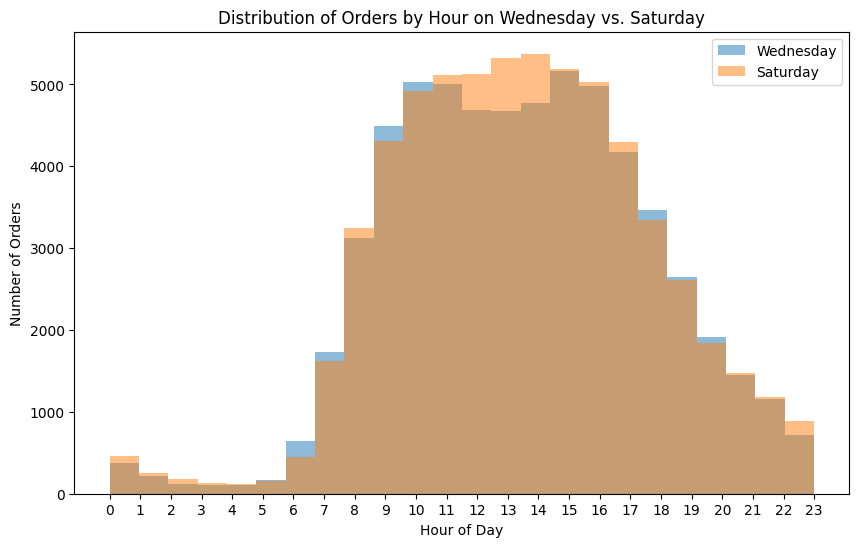

In [36]:
plt.figure(figsize=(10, 6))

plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour on Wednesday vs. Saturday')
plt.xticks(range(0, 24))
plt.legend()

plt.show()

Orders on Saturdays are more numerous than on Wednesdays between 11 AM and 2 PM.

### [B2] What's the distribution for the number of orders per customer?

In [37]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

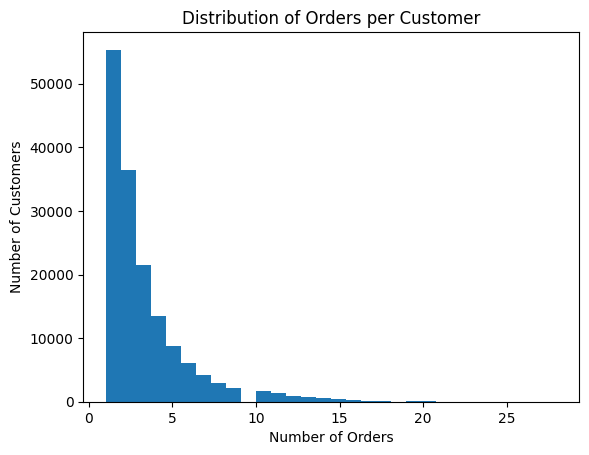

In [38]:
plt.hist(orders_per_user, bins=30)  # Adjust the bins as needed to get a clear picture
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

Most customers place between 1 and 5 orders. 

### [B3] What are the top 20 popular products (display their id and name)?

       product_id              product_name  reorder_count
18104       24852                    Banana          55763
9528        13176    Bag of Organic Bananas          44450
15368       21137      Organic Strawberries          28639
15936       21903      Organic Baby Spinach          26233
34407       47209      Organic Hass Avocado          23629
34828       47766           Organic Avocado          18743
20285       27845        Organic Whole Milk          16251
34725       47626               Large Lemon          15044
20375       27966       Organic Raspberries          14748
12193       16797              Strawberries          13945
19088       26209                     Limes          13327
16700       22935      Organic Yellow Onion          11145
18186       24964            Organic Garlic          10411
32792       45007          Organic Zucchini          10076
36219       49683            Cucumber Kirby           9538
20543       28204        Organic Fuji Apple           89

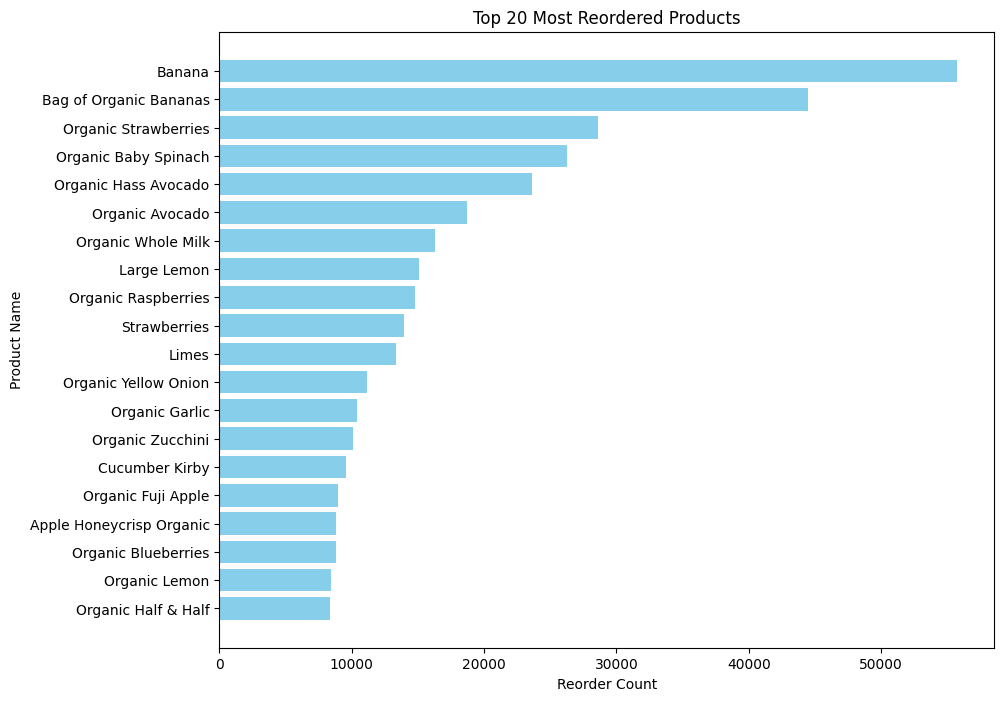

In [39]:

merged_df = pd.merge(order_products[order_products['reordered'] == 1], 
                     products, 
                     on='product_id', 
                     how='left')
# Count reorders for each product
reorder_counts = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='reorder_count')
# Sort the values to find top reordered products
top_reordered = reorder_counts.sort_values('reorder_count', ascending=False).head(20)
# Display the top 20 items that are reordered most frequently
print(top_reordered[['product_id', 'product_name', 'reorder_count']])
# Create a bar chart
plt.figure(figsize=(10,8))
plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='skyblue')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')
plt.title('Top 20 Most Reordered Products')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

This chart displays the most reordered products. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

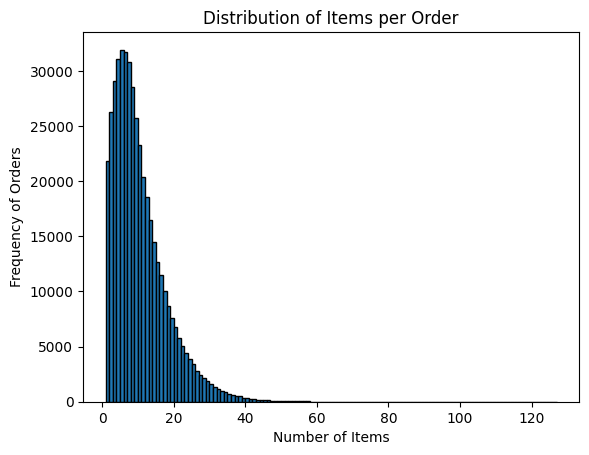

In [40]:
order_item_counts = order_products.groupby('order_id')['product_id'].count().reset_index(name='item_count')
order_item_counts['item_count'].describe()
plt.hist(order_item_counts['item_count'], bins=range(1, order_item_counts['item_count'].max()+1), edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency of Orders')
plt.show()

Most orders contain between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [41]:
merged_df = pd.merge(order_products[order_products['reordered'] == 1], 
                     products, 
                     on='product_id', 
                     how='left')
# Count reorders for each product
reorder_counts = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='reorder_count')
# Sort the values to find top reordered products
top_reordered = reorder_counts.sort_values('reorder_count', ascending=False).head(20)
# Display the top 20 items that are reordered most frequently
print(top_reordered[['product_id', 'product_name', 'reorder_count']])

       product_id              product_name  reorder_count
18104       24852                    Banana          55763
9528        13176    Bag of Organic Bananas          44450
15368       21137      Organic Strawberries          28639
15936       21903      Organic Baby Spinach          26233
34407       47209      Organic Hass Avocado          23629
34828       47766           Organic Avocado          18743
20285       27845        Organic Whole Milk          16251
34725       47626               Large Lemon          15044
20375       27966       Organic Raspberries          14748
12193       16797              Strawberries          13945
19088       26209                     Limes          13327
16700       22935      Organic Yellow Onion          11145
18186       24964            Organic Garlic          10411
32792       45007          Organic Zucchini          10076
36219       49683            Cucumber Kirby           9538
20543       28204        Organic Fuji Apple           89

### [C3] For each product, what proportion of its orders are reorders?

In [42]:
# Merge DataFrames on 'product_id'
merged_df = pd.merge(order_products, products, on='product_id')
# Group by 'product_id' and 'product_name', and calculate mean of 'reordered'
reorder_proportions = merged_df.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()
# Rename the 'reordered' column to something more descriptive
reorder_proportions = reorder_proportions.rename(columns={'reordered': 'reorder_proportion'})
# Now, reorder_proportions DataFrame contains each product, its ID, and its reorder proportion
print(reorder_proportions.head())

   product_id                                       product_name  \
0           1                         Chocolate Sandwich Cookies   
1           2                                   All-Seasons Salt   
2           3               Robust Golden Unsweetened Oolong Tea   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4           7                     Pure Coconut Water With Orange   

   reorder_proportion  
0            0.564286  
1            0.000000  
2            0.738095  
3            0.510204  
4            0.500000  


### [C4] For each customer, what proportion of their products ordered are reorders?

In [43]:
# Merge the dataframes on order_id to associate user_id with each product
merged_df = pd.merge(orders[['order_id', 'user_id']], order_products[['order_id', 'product_id', 'reordered']], on='order_id')
# Group by user_id
grouped = merged_df.groupby('user_id')
# Calculate the total number of reordered products per customer
reordered_sum = grouped['reordered'].sum()
# Count the number of products ordered by each customer
order_count = grouped['product_id'].count()
# Calculate the proportion of reorders
proportion_reorders = reordered_sum / order_count
# Display the result
proportion_reorders.head()


user_id
2    0.038462
4    0.000000
5    0.666667
6    0.000000
7    0.928571
dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

   product_id  reorder_proportion
0           1            0.564286
1           2            0.000000
2           3            0.738095
3           4            0.510204
4           7            0.500000


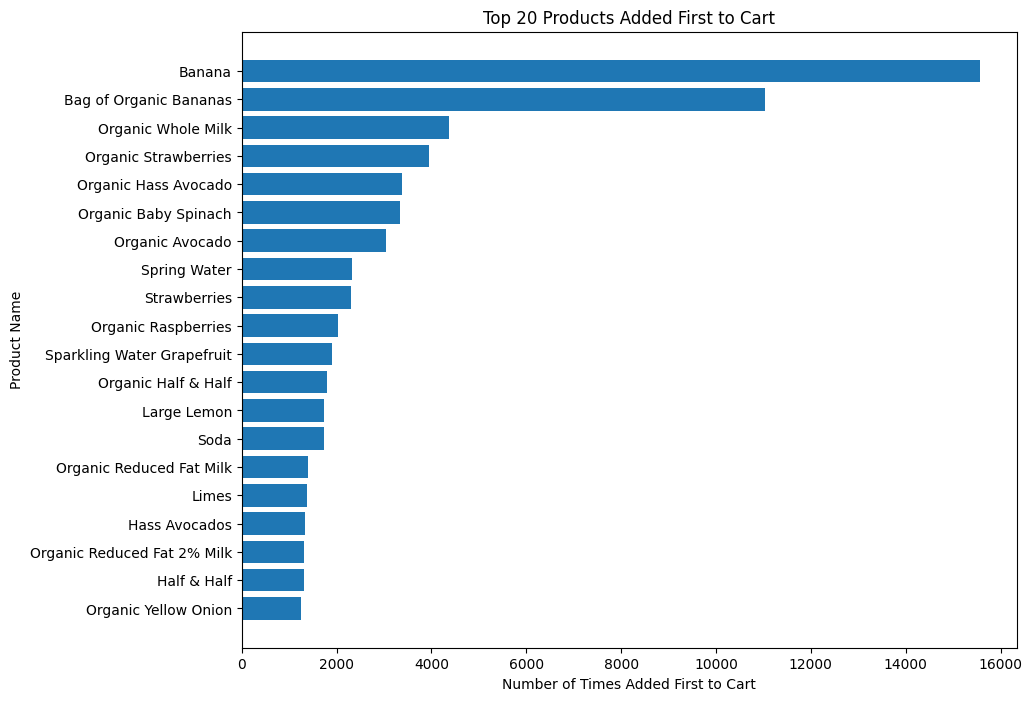

In [44]:
# Step 1: Calculate the sum of reorders https://jupyterhub.tripleten-services.com/user/user-3-f692393f-201c-4106-8bd9-d4f8721e4d54/notebooks/86f5d001-fab3-4078-b174-98778c7e4224.ipynb#[C5]-What-are-the-top-20-items-that-people-put-in-their-carts-first?rs for each product
reorders_sum = order_products.groupby('product_id')['reordered'].sum()

# Step 2: Count the total number of orders for each product
orders_count = order_products.groupby('product_id')['reordered'].count()

# Step 3: Calculate the proportion of reorders
proportion_reorders = reorders_sum / orders_count

# Preparing the DataFrame
proportion_df = proportion_reorders.reset_index()
proportion_df.columns = ['product_id', 'reorder_proportion']

# Step 5: Display the result
print(proportion_df.head())  # Display the first few rows as an example

first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
first_in_cart_counts = first_in_cart['product_id'].value_counts().reset_index()
first_in_cart_counts.columns = ['product_id', 'first_added_count']
top_first_added = first_in_cart_counts.merge(products, on='product_id')
top_20_first_added = top_first_added.sort_values(by='first_added_count', ascending=False).head(20)
plt.figure(figsize=(10,8))
plt.barh(top_20_first_added['product_name'], top_20_first_added['first_added_count'])
plt.xlabel('Number of Times Added First to Cart')
plt.ylabel('Product Name')
plt.title('Top 20 Products Added First to Cart')
plt.gca().invert_yaxis()  # To display the product with the highest count at the top
plt.show()


Here, products which were most frequently added to carts first are shown. 

### Conclusion 

This project analyzes Instacart customer behavior to uncover patterns in grocery shopping habits. Most orders are placed between 9 AM and 5 PM, with Sunday being the most active day. Customers frequently reorder the same top 20 products, and a small group of users drives most repeat purchases. Visualizations highlight when and how people shop, including which products are most often added to carts first. These insights address complex business questions and support data-driven marketing and inventory strategies.

